### Kaggle泰坦尼克号分析
    https://zhuanlan.zhihu.com/p/342552186 
- 数据的基本统计分析
- 数据的属性探查
- 数据预处理
- 数据的相关性分析
- 特征工程
- 数据模型构建
- 交叉检验
- 特征选择
- 模型过拟合分析

#### 1. 数据的基本统计分析

In [6]:
import pandas as pd
import numpy as np

data_train=pd.read_csv("train.csv")
data_test=pd.read_csv("test.csv")

print(data_train.info())
print(data_test.info())

#各列属性的统计信息
print(data_train.describe())
print(data_test.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pcl

#### 结论：
属性信息
- Survived（获救情况）变量为因变量，其值只有两类1或0，代表着获救或未获救；
- Pclass（乘客等级），Sex（性别），Embarked（登船港口）是明显的类别型数据
- Age（年龄），SibSp（堂兄弟妹个数），Parch（父母与小孩的个数）则是隐性的类别型数据；
- Fare（票价）是数值型数据；
- Cabin（船舱）则为文本型数据；
- Age（年龄），Cabin（船舱）和Embarked（登船港口）信息存在缺失数据。

统计信息
- 重点点关注标准差，最小值和最大值三个指标
- 标准差反映了数据的离散程度
- 最大和最小值一般可以看出数据是否有异常值，箱线图查看异常值

#### 2. 数据的属性探测：针对单个属性研究分布

- 查看获救情况

In [7]:
import matplotlib.pyplot as plt
import seaborn

#显示中文标题
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

#查看有多少人 丧生0:获救1
print(data_train['Survived'].value_counts())

ModuleNotFoundError: No module named 'matplotlib'

- 分类型和数值型数据非常适合绘图
- 乘客等级Pclass、性别Sex、年龄Age、票价Fare和登船港口Embarked五类属性分别绘图

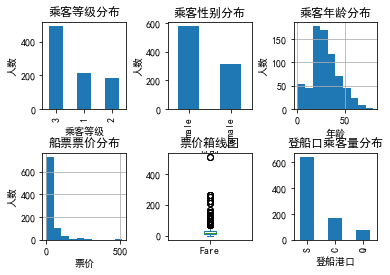

In [142]:
fig=plt.figure()

#乘客等级分布
plt.subplot2grid((2,3),(0,0))
data_train['Pclass'].value_counts().plot(kind='bar')
plt.ylabel(u'人数')
plt.xlabel(u'乘客等级')
plt.title(u'乘客等级分布')


#乘客性别分布,柱状图bar
plt.subplot2grid((2,3),(0,1))
data_train['Sex'].value_counts().plot(kind='bar')
plt.ylabel(u'人数')
plt.xlabel(u'性别')
plt.title(u'乘客性别分布')

#乘客年龄分布，直方图Hist
plt.subplot2grid((2,3),(0,2))
data_train['Age'].hist()
plt.ylabel(u'人数')
plt.xlabel(u'年龄')
plt.title(u'乘客年龄分布')


#船票票价分布
plt.subplot2grid((2,3),(1,0))
data_train['Fare'].hist()
plt.ylabel(u'人数')
plt.xlabel(u'票价')
plt.title(u'船票票价分布')

#船票异常值分布，箱线图Box
plt.subplot2grid((2,3),(1,1))
data_train['Fare'].plot(kind='box')
plt.title(u'票价箱线图')


#登船港口分布图
plt.subplot2grid((2,3),(1,2))
data_train['Embarked'].value_counts().plot(kind='bar')
plt.xlabel(u'登船港口')
plt.title(u'登船口乘客量分布')

plt.subplots_adjust(wspace=0.5,hspace=0.5)
plt.show()


#### 图表结论
- 三个柱状图：分类量
    1. 乘客等级上，3等乘客人数最多，其次是1、2等
    2. 乘客性别上，男性多于女性
    3. 登船港口上，乘客量由高到低的分别是S>C>Q  
    
- 两个直方图：连续量
    1. 乘客年龄，20~30岁人数较多
    2. 票价存在异常值，继续分析

In [143]:
#异常值：max  min
print(data_train[data_train['Fare'] == min(data_train['Fare'])]['Fare'].value_counts())
print(data_train[data_train['Fare'] == max(data_train['Fare'])]['Fare'].value_counts())

0.0    15
Name: Fare, dtype: int64
512.3292    3
Name: Fare, dtype: int64


- 票价异常值

    1. min 最小值0 ，有 15 条记录
    2. max 最大值512.3292，有 3 条记录

    异常值不一定错误：极小值可能是优惠票，极大值可能是VIP票

- 探测剩余的属性分布

    1. 剩余的类别属性：

        Sibsp堂兄妹个数
        Parch父母与小孩的个数
    
    2. 文本类型属性：

        Cabin船舱信息（缺失严重）


In [144]:
print(data_train['SibSp'].value_counts())
print(data_train['Parch'].value_counts())

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


这两类属性在值为0，1时人数较多

船舱：

1. Cabin船舱信息缺失值严重，且为文本类信息，不深入分析；
2. 观察到Cabin形式，如：A18，字母+数字；
3. 类似于高铁座位号，可将两部分分离再分析，字母分布代表位置分布

In [145]:
data_train['level']=data_train['Cabin'].str.extract(r'([A-Za-z])')
print(data_train['level'].value_counts())

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: level, dtype: int64


可见，船舱信息中，C/B/D/E位置人数最多。

#### 3. 数据预处理

        处理缺失值、异常值

首先界定处理范围：

        1. 票价异常值合理，不讨论
        2. 船舱缺失值严重，不分析
        3. 年龄、登陆港口存在少量缺失值，填充

- 缺失值填充：年龄

    1. 基本填充方法：删除、固定值填充、均值/中位数/众数填充
    2. 较复杂的预测填充
    3. 此数据集较小，基本填充方法难以反映缺失数据的特性，故采用预测填充（随机森林）
    4. 随机森林算法：借助其他属性值，预测缺失数据值

In [146]:
from sklearn.ensemble import RandomForestRegressor

def set_missing_age(df):
    #取出数值特征，放入随机森林进行训练
    age_df=df[['Age','Fare','Parch','SibSp','Pclass']]

    #按是否缺失，将乘客划分为：已知年龄、未知年龄
    know_age=age_df[age_df.Age.notnull()].values
    unknow_age=age_df[age_df.Age.isnull()].values

    #目标数据y：所有行的age列（第一列）
    y=know_age[:,0]
    #特征属性数据x：除了age以外的其他属性列
    x=know_age[:,1:]

    #利用随机森林进行拟合RandomForestRegressor
    #random_state: Controls both the randomness of 
    #    the bootstrapping of the samples used when building trees
    #n_estimator: The number of trees in the forest.
    #n_jobs: The number of jobs to run in parallel. -1 use all
    rfr=RandomForestRegressor(random_state=0,n_estimators=2000,n_jobs=-1)
    rfr.fit(x,y)

    #利用训练的模型进行预测
    predictedAge=rfr.predict(unknow_age[:,1::])

    #填补缺失的原始数据
    df.loc[(df.Age.isnull()),'Age']=predictedAge

    return df

data_train=set_missing_age(data_train)





- 缺失值填充：登陆港口

        仅有两条缺失，直接删除

In [147]:
data=data_train.drop(data_train[data_train.Embarked.isnull()].index)
#新建表赋值，不覆盖原来的表

#### 4. 数据相关性分析

        1. 冗余关系
        2. 因果关系（重要）： 属性之间、单个属性与结果


- 属性间的相关性

        df.corr()  相关系数

            Pclass       Age     SibSp     Parch      Fare  Survived
Pclass    1.000000 -0.391786  0.081656  0.016824 -0.548193 -0.335549
Age      -0.391786  1.000000 -0.322946 -0.219123  0.090576 -0.059086
SibSp     0.081656 -0.322946  1.000000  0.414542  0.160887 -0.034040
Parch     0.016824 -0.219123  0.414542  1.000000  0.217532  0.083151
Fare     -0.548193  0.090576  0.160887  0.217532  1.000000  0.255290
Survived -0.335549 -0.059086 -0.034040  0.083151  0.255290  1.000000


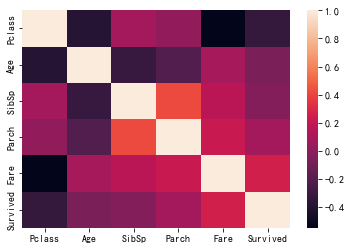

In [148]:
import seaborn
df = data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']]
#属性间相关系数
cor=df.corr()
print(cor)

#绘制相关性热力图
seaborn.heatmap(cor)
plt.show()

结论

    1. 各个结果之间的相关性都不大

    2. 橙色部分的，SibSp与Parch略有相关性

    3. 相关性系数利于分析数值型数据，而对于分类型数据进一步分析单个属性与结果的关系

- 单个属性与结果的相关性

    1. 常规分类型数据
    2. 其他：SibSp和Parch，分类数较多且有些相关

中年    799
儿童     68
老年     21
Name: Age_cut, dtype: int64


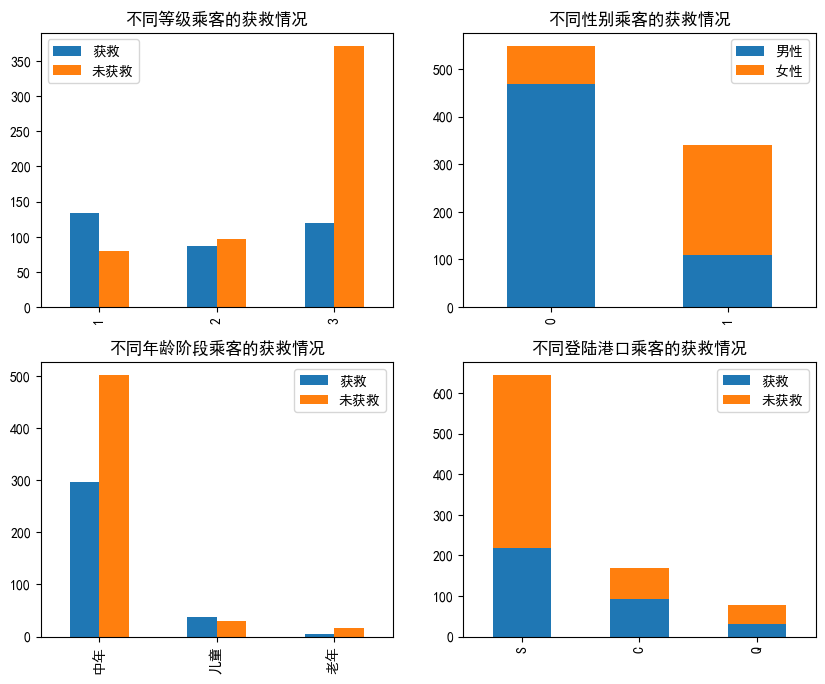

In [149]:
# 绘图
plt.figure(figsize=(10, 8), dpi=100)

# 乘客的等级和获救情况的关系, 从结果上发现，1和2等级的乘客获救率明显高于3等级的乘客
p1 = plt.subplot(221)
Pclass_0 = data.loc[data['Survived'] == 0, 'Pclass'].value_counts()
Pclass_1 = data.loc[data['Survived'] == 1, 'Pclass'].value_counts()
df_pclass = pd.DataFrame({u'获救':Pclass_1,u'未获救':Pclass_0})
df_pclass.plot(kind='bar', ax=p1)
plt.title(u'不同等级乘客的获救情况')

# 同样的方法，我们看一下性别和获救情况的关系,结果非常明显，女性比男性的获救率高
p2 = plt.subplot(222)
Survived_m = data.loc[data['Sex'] == 'male', 'Survived'].value_counts()
Survived_f = data.loc[data['Sex'] == 'female', 'Survived'].value_counts()
df_sex = pd.DataFrame({u'男性':Survived_m, u'女性':Survived_f})
df_sex.plot(kind='bar', stacked=True, ax=p2)
plt.title(u'不同性别乘客的获救情况')

# 年龄划分，划分的标准：0~10为儿童；10~60为成年人；60及以上为老年人
p3 = plt.subplot(223)
bins = [min(data['Age']), 10, 60, max(data['Age'])]
bins_label = ['儿童', '中年', '老年']
data['Age_cut'] = pd.cut(data['Age'], bins=bins, labels=bins_label)
print(data['Age_cut'].value_counts())
# 再对数据进行统计，结果发现儿童的获救率明显高于成年人和老年人
Age_0 = data.loc[data['Survived'] == 0, 'Age_cut'].value_counts()
Age_1 = data.loc[data['Survived'] == 1, 'Age_cut'].value_counts()
df_age = pd.DataFrame({u'获救':Age_1, u'未获救':Age_0})
df_age.plot(kind='bar', ax=p3)
plt.title(u'不同年龄阶段乘客的获救情况')

# 登录港口和获救情况的关系
p4 = plt.subplot(224)
Embarked_0 = data.Embarked[data.Survived == 0].value_counts()
Embarked_1 = data.Embarked[data.Survived == 1].value_counts()
df_Embarked = pd.DataFrame({u'获救': Embarked_1, u'未获救': Embarked_0})
df_Embarked.plot(kind='bar', stacked=True, ax=p4)
plt.title(u'不同登陆港口乘客的获救情况')

plt.show()



结论

    1. 高级别的乘客获救率高
    2. 女性获救率高于男性
    3. 儿童获救率高于成年人和老人
    4. S港登陆人数多，C港获救率略高

其次，针对类别较多的SibSp和Parch属性，我们直接统计各类的是否获救情况。

In [150]:

g1=data.groupby(['SibSp','Survived'])
df_SibSp = pd.DataFrame(g1.count()['PassengerId'])
df_SibSp.rename(columns={'PassengerId':'count'},inplace=True)
print(df_SibSp)

g2=data.groupby(['Parch','Survived'])
df_Parch=pd.DataFrame(g2.count()['PassengerId'])
df_Parch.rename(columns={'PassengerId':'count'},inplace=True)
print(df_Parch)

                count
SibSp Survived       
0     0           398
      1           208
1     0            97
      1           112
2     0            15
      1            13
3     0            12
      1             4
4     0            15
      1             3
5     0             5
8     0             7
                count
Parch Survived       
0     0           445
      1           231
1     0            53
      1            65
2     0            40
      1            40
3     0             2
      1             3
4     0             4
5     0             4
      1             1
6     0             1


结论

        SibSp<3  和 Parch<3  时， 获救率更高。

最后，再次分析Fare票价与获救情况的关系；

- 票价为连续数值型 - > 密度分布图

- 因为无法像年龄一样有明显的分段：老中少

In [151]:
#密度分布图

In [152]:

print(data.loc[data['Fare'] == 0, 'Survived'].value_counts())
print(data.loc[data['Fare'] == max(data['Fare']), 'Survived'].value_counts())

0    14
1     1
Name: Survived, dtype: int64
1    3
Name: Survived, dtype: int64


结论

        1. 票价为0的15人，仅1人获救
        2. 票价最高的3人，全部获救

        票价高获救率高。

#### 5. 特征工程

In [153]:
import sklearn.preprocessing as preprocessing

#特征因子化
def set_numeralization(data):
    #针对定类性属性分别因子化：Embarked Sex Pclass
    dummied_Embarked=pd.get_dummies(data['Embarked'],prefix='Embarked')
    dummied_Sex=pd.get_dummies(data['Sex'],prefix='Sex')
    dummied_Pclass=pd.get_dummies(data['Pclass'],prefix='Pclass')

    #合并新属性，剔除旧属性
    df=pd.concat([data,dummied_Embarked,dummied_Sex,dummied_Pclass],axis=1)
    df.drop(['Pclass','Sex','Embarked'],axis=1,inplace=True)
    return df

#特征归一化
def set_normalization(df):
    scaler=preprocessing.StandardScaler()
    age_scaler_param=scaler.fit(df['Age'].values.reshape(-1,1))
    df['Age_scaler']=scaler.transform(df['Age'].values.reshape(-1,1),age_scaler_param)
    fare_scaler_param=scaler.fit(df['Fare'].values.reshape(-1,1))
    df['Fare_scaler']=scaler.transform(df['Fare'].values.reshape(-1,1),fare_scaler_param)
    return df

#特征工程
data= set_numeralization(data)
data=set_normalization(data)

In [154]:
# data.rename(columns={'age_scaler':'Age_scaler'},inplace=True)
# data.rename(columns={'fare_scaler':'Fare_scaler'},inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  889 non-null    int64   
 1   Survived     889 non-null    int64   
 2   Name         889 non-null    object  
 3   Age          889 non-null    float64 
 4   SibSp        889 non-null    int64   
 5   Parch        889 non-null    int64   
 6   Ticket       889 non-null    object  
 7   Fare         889 non-null    float64 
 8   Cabin        202 non-null    object  
 9   level        202 non-null    object  
 10  Age_cut      888 non-null    category
 11  Embarked_C   889 non-null    uint8   
 12  Embarked_Q   889 non-null    uint8   
 13  Embarked_S   889 non-null    uint8   
 14  Sex_female   889 non-null    uint8   
 15  Sex_male     889 non-null    uint8   
 16  Pclass_1     889 non-null    uint8   
 17  Pclass_2     889 non-null    uint8   
 18  Pclass_3     889 non-null    u

#### 6. 数据建模

        二分类问题 - > 逻辑回归模型

In [155]:
from sklearn import linear_model
# 利用正则表达式取出需要的属性
train_df = data_train.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Embarked_.*|Sex_.*|Pclass_.*')
train_np = train_df.values

test_df = data_test.filter(regex='Age_.*|SibSp|Parch|Fare_.*|Embarked_.*|Sex_.*|Pclass_.*')

# 获取y
y = train_np[:,0]
# 获取自变量x
x = train_np[:,1:]

# 利用逻辑回归进行拟合,得到训练的模型
clf = linear_model.LogisticRegression(solver='liblinear',C=1.0,penalty='l2',tol=1e-6)
clf.fit(x,y)

# 对测试数据进行预测
predictions = clf.predict(test_df)
result = pd.DataFrame({'PassengerId':data_test['PassengerId'].values,'Survived':predictions.astype(np.int32)})
print(result.head())

# 模型中各属性的系数（用于分析各特征的贡献度）
feature_corr = pd.DataFrame({'columns':list(train_df.columns)[1:],'coef':list(clf.coef_.T)})
print(feature_corr)

   PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         0
4          896         0
  columns                   coef
0   SibSp  [-0.1594196079516946]
1   Parch  [0.28911975046852934]


/mnt/d/ShareLinuxFile/Pyenv/venv/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


#### 7. 交叉验证

    目的：检验模型的好坏
    做法：对模型分割5次，每次20%拿去检测，80%用于训练，输出每次的精度，和五次精度平均值。

In [156]:
from sklearn.model_selection import cross_val_score
train_df = data_train.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Embarked_.*|Sex_.*|Pclass_.*')
train_np = train_df.values
# 获取y
y = train_np[:, 0]
# 获取自变量x
x = train_np[:, 1:]

# 利用逻辑回归进行拟合,得到训练的模型
clf = linear_model.LogisticRegression(solver='liblinear', C=1.0, penalty='l2', tol=1e-6)
clf.fit(x, y)

# 交叉检验
score = cross_val_score(clf, x, y, cv=5, scoring='accuracy')
print(score)
print(score.mean())

[0.61452514 0.61797753 0.62921348 0.62359551 0.61235955]
0.619534241416107


#### 8. 特征选择


In [ ]:
# 对于SibSp属性，我们划分成0,1~2，3~8三个等级
data['SibSp_cut'] = 1
data.loc[data['SibSp'] == 0, 'SibSp_cut'] = 0
data.loc[data['SibSp'] >= 3, 'SibSp_cut'] = 2

# 对于Parch属性，我们划分成0,1~3，4~6三个等级
data['Parch_cut'] = 1
data.loc[data['Parch'] == 0, 'Parch_cut'] = 0
data.loc[data['Parch'] > 3, 'Parch_cut'] = 2

# 因子化处理
dummies_SibSp = pd.get_dummies(data['SibSp_cut'], prefix='SibSp')
dummies_Parch = pd.get_dummies(data['Parch_cut'], prefix='Parch')
data.drop(['SibSp_cut', 'Parch_cut'], axis=1, inplace=True)

# 数据归一化
transfer = preprocessing.MinMaxScaler(feature_range=[0, 1])
data['Age_scaled'] = transfer.fit_transform(data['Age'].values.reshape(-1, 1))
data['Fare_scaled'] = transfer.fit_transform(data['Fare'].values.reshape(-1, 1))

# 数据合并
df = pd.concat([data, dummies_SibSp, dummies_Parch], axis=1)

# 特征筛选
data_train = df.filter(regex='Survived|Age_.*|SibSp_.*|Parch_.*|Fare_.*|Cabin_.*|Embarked_.*|Sex_.*|Pclass_.*')

# 模型的交叉检验
train_np = data_train.values
# 获取y
y = train_np[:, 0]
# 获取自变量x
x = train_np[:, 1:]

# 利用逻辑回归进行拟合,得到训练的模型
clf = linear_model.LogisticRegression(solver='liblinear', C=1.0, penalty='l2', tol=1e-6)
clf.fit(x, y)

feature_corr = pd.DataFrame({'columns': list(data_train.columns)[1:], 'coef': list(clf.coef_.T)})
print(feature_corr)

# 交叉检验
score = cross_val_score(clf, x, y, cv=5, scoring='accuracy')
print(score)
print(score.mean())

#### 9. 模型的过拟合分析

In [ ]:
# 绘制学习曲线
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=1,
                        train_sizes=np.linspace(.05, 1.0, 20), verbose=0, plot=True):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, verbose=verbose)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    if plot:
        plt.figure()
        plt.title(title)
        if ylim is not None:
            plt.ylim(*ylim)
        plt.xlabel(u"训练样本数")
        plt.ylabel(u"得分")
        plt.gca().invert_yaxis()
        plt.grid()

        plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std,
                         alpha=0.1, color="b")
        plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std,
                         alpha=0.1, color="r")
        plt.plot(train_sizes, train_scores_mean, 'o-', color="b", label=u"训练集上得分")
        plt.plot(train_sizes, test_scores_mean, 'o-', color="r", label=u"交叉验证集上得分")

        plt.legend(loc="best")

        plt.draw()
        plt.gca().invert_yaxis()
        plt.show()

# train_np = data_train.values
# 获取y
y = train_np[:, 0]
# 获取自变量x
X = train_np[:, 1:]

clf = linear_model.LogisticRegression(solver='liblinear', C=1.0, penalty='l2', tol=1e-6)
clf.fit(X, y)
plot_learning_curve(clf, u"学习曲线", X, y)